In [3]:
import os
import sys 
os.environ["SPARK_HOME"]="C:\Users\bulzi\Downloads\spark-2.0.0-bin-hadoop2.6"
os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

In [4]:
import findspark
findspark.init("C:\\Users\\bulzi\\Downloads\\spark-2.0.0-bin-hadoop2.6")

In [5]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

In [11]:
%%writefile data/OctagonExcel.txt
from xlrd import open_workbook
wb = open_workbook('data\OctagonExcel.xls')
for sheet in wb.sheets():
    for i in range(sheet.nrows-1):
        row = sheet.row(i)
        print row[0],row[5]

Writing data/OctagonExcel.txt


In [13]:
%%writefile src/OctagonExcel.py
#coding: utf-8
from xlrd import open_workbook
wb = open_workbook('data\OctagonExcel.xls')
for sheet in wb.sheets():
    for i in range(sheet.nrows-1):
        row = sheet.row(i)
        print row[0],row[5]

Writing src/OctagonExcel.py


In [14]:
!python src/OctagonExcel.py

text:u'\uae30\uac04' text:u'\ubbf8\uc138\uba3c\uc9c0(\u338d/\u33a5)'
text:u'2015.01' number:49.0
text:u'2015.02' number:84.0
text:u'2015.03' number:71.0
text:u'2015.04' number:45.0
text:u'2015.05' number:45.0
text:u'2015.06' number:35.0
text:u'2015.07' number:30.0
text:u'2015.08' number:34.0
text:u'2015.09' number:29.0
text:u'2015.10' number:45.0
text:u'2015.11' number:33.0
text:u'2015.12' number:48.0
text:u'2016.01' number:50.0
text:u'2016.02' number:45.0
text:u'2016.03' number:64.0
text:u'2016.04' number:71.0
text:u'2016.05' number:56.0
text:u'2016.06' number:46.0
text:u'2016.07' number:33.0
text:u'2016.08' number:34.0
text:u'2016.09' number:37.0
text:u'2016.10' number:37.0
text:u'2016.11' number:53.0
text:u'2016.12' number:48.0
text:u'2017.01' number:53.0
text:u'2017.02' number:46.0
text:u'2017.03' number:60.0


### 출력 결과 저장

In [30]:
out=open("OctagonExcel.txt",'w')
from xlrd import open_workbook
wb = open_workbook('data\OctagonExcel.xls')
for sheet in wb.sheets():
    for i in range(sheet.nrows-1):
        row = sheet.row(i)
        print (row[0],row[5],file=out)
out.close()

In [12]:
import pyspark
import os
myConf = pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder.master('local').appName('myApp').config(conf=myConf).getOrCreate()
filepath = os.path.join('data','OctagonExcel.txt')
Rdd = spark.sparkContext.textFile(filepath)
print Rdd.first()

from xlrd import open_workbook


#### 출력 All

In [120]:
from __future__ import print_function
from xlrd import open_workbook
wb = open_workbook('data\OctagonExcel.xls', encoding_override='utf-8')
for i in range(sheet.nrows):
    row = sheet.row(i)
    #print row[0],row[1],row[5]
    #print(map(lambda x: x.encode('utf-8') if isinstance(x, unicode) else x, row))
    #print(map(lambda x: x.value.encode('utf-8') if isinstance(x.value, unicode) else x, row))
    for cell in row:
        print(cell.value, end=' ') 
    print() 

기간 구분 아황산가스(ppm) 일산화탄소(ppm) 이산화질소(ppm) 미세먼지(㎍/㎥) 초미세먼지(㎍/㎥) 오존(ppm) 
2015.01 대기오염 0.007 0.7 0.037 49.0 25.0 0.011 
2015.02 대기오염 0.007 0.6 0.036 84.0 30.0 0.016 
2015.03 대기오염 0.007 0.6 0.04 71.0 30.0 0.022 
2015.04 대기오염 0.005 0.5 0.033 45.0 21.0 0.028 
2015.05 대기오염 0.006 0.4 0.032 45.0 22.0 0.033 
2015.06 대기오염 0.005 0.4 0.025 35.0 20.0 0.038 
2015.07 대기오염 0.005 0.4 0.021 30.0 19.0 0.027 
2015.08 대기오염 0.005 0.4 0.023 34.0 22.0 0.029 
2015.09 대기오염 0.004 0.4 0.028 29.0 16.0 0.025 
2015.10 대기오염 0.005 0.5 0.035 45.0 25.0 0.019 
2015.11 대기오염 0.005 0.6 0.034 33.0 21.0 0.012 
2015.12 대기오염 0.006 0.7 0.039 48.0 28.0 0.009 
2016.01 대기오염 0.006 0.6 0.035 50.0 27.0 0.014 
2016.02 대기오염 0.006 0.6 0.033 45.0 23.0 0.018 
2016.03 대기오염 0.006 0.6 0.038 64.0 32.0 0.025 
2016.04 대기오염 0.005 0.5 0.036 71.0 30.0 0.031 
2016.05 대기오염 0.005 0.5 0.031 56.0 29.0 0.039 
2016.06 대기오염 0.005 0.4 0.028 46.0 28.0 0.037 
2016.07 대기오염 0.004 0.4 0.024 33.0 22.0 0.026 
2016.08 대기오염 0.004 0.4 0.023 34.0 22.0 0.03 
2016.09 대기오염 

### 위의 단순 정보 중 필요한 것만 분류

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('data\OctagonExcel.xls')
%matplotlib inline
df

,기간,구분,아황산가스(ppm),일산화탄소(ppm),이산화질소(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm)
0,2015.01,대기오염,0.007,0.7,0.037,49.0,25.0,0.011
1,2015.02,대기오염,0.007,0.6,0.036,84.0,30.0,0.016
2,2015.03,대기오염,0.007,0.6,0.040,71.0,30.0,0.022
3,2015.04,대기오염,0.005,0.5,0.033,45.0,21.0,0.028
4,2015.05,대기오염,0.006,0.4,0.032,45.0,22.0,0.033
5,2015.06,대기오염,0.005,0.4,0.025,35.0,20.0,0.038
6,2015.07,대기오염,0.005,0.4,0.021,30.0,19.0,0.027
7,2015.08,대기오염,0.005,0.4,0.023,34.0,22.0,0.029
8,2015.09,대기오염,0.004,0.4,0.028,29.0,16.0,0.025
9,2015.10,대기오염,0.005,0.5,0.035,45.0,25.0,0.019


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
table = pd.read_excel('data\OctagonExcel.xls',
                     header = 0,
                     parse_cols ="A, F",
                     convert_float = True)
table.head(27)

,기간,미세먼지(㎍/㎥)
0,2015.01,49.0
1,2015.02,84.0
2,2015.03,71.0
3,2015.04,45.0
4,2015.05,45.0
5,2015.06,35.0
6,2015.07,30.0
7,2015.08,34.0
8,2015.09,29.0
9,2015.10,45.0


### 출력 데이터 차트화

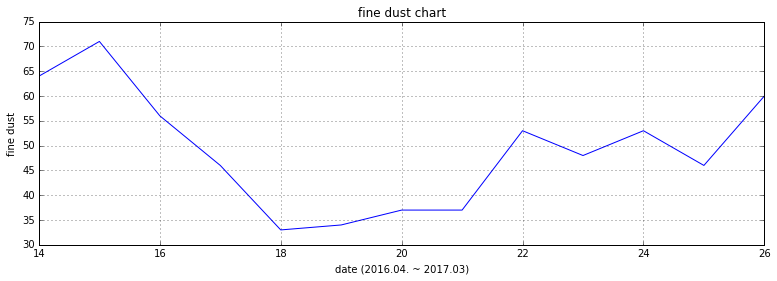

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
table = pd.read_excel('data\OctagonExcel.xls',
                     header = 0,
                     parse_cols ="A, F",
                     convert_float = True)
%matplotlib inline


plt.figure(figsize=(13,4))

plt.xlabel('date (2016.04. ~ 2017.03)')
plt.ylabel('fine dust')
plt.title('fine dust chart')
plt.grid()
plt.plot(table.loc[14:,table.columns[1]])
#plt.plot(table.loc[14:])
#plt.plot(table[table.columns[0]],table[table.columns[1]])
#plt.xlim(15,17)
#plt.ylim(0,100)
plt.show()

### 공공데이터 미세먼지 예보 API 사용 및 네이버데이터랩 카드 사용 통계 가져오기
* 45704e706462756c3634796c526f78
* http://datalab.naver.com/local/card_result.naver
    * 실행 성공

In [17]:
%%writefile data/mylib.py
def say():
    print 'hi'

def getKey(keyPath):
    d=dict()
    f=open(keyPath,'r')
    for line in f.readlines():
        row=line.split('=')
        row0=row[0]
        d[row0]=row[1].strip()
    return d

Overwriting data/mylib.py


In [18]:
import data.mylib
print data.mylib.say()

hi
None


In [5]:
import os
import data.mylib

keyPath=os.path.join(os.getcwd(), 'data', 'key.properties')
key=data.mylib.getKey(keyPath)

In [28]:
%%writefile data/key.properties
dataseoul=45704e706462756c3634796c526f78

Overwriting data/key.properties


In [12]:
%%writefile data/dust.py
# coding: utf-8
import os
import requests
import urlparse
import mylib

def doIt():
    keyPath=os.path.join(os.getcwd()+'/key.properties')
    key=mylib.getKey(keyPath)
    # (1) make params with resource IDs
    KEY=key['dataseoul']
    TYPE='json'
    SERVICE='ForecastWarningMinuteParticleOfDustService'
    START_INDEX=str(1)
    END_INDEX=str(5)
    #LINE_NUM=str(2)
    params=os.path.join(KEY,TYPE,SERVICE,START_INDEX,END_INDEX)
    # (2) make a full url
    _url='http://openAPI.seoul.go.kr:8088/'
    url=urlparse.urljoin(_url,params)
    url=url.replace('\\','/')
    # (3) get data
    data=requests.get(url).text
    print data

if __name__ == "__main__":
    doIt()

Writing data/dust.py


In [130]:
from PIL import Image

im1 = Image.open("data/caffe.jpg")
im2 = Image.open("data/bar.jpg")
im3 = Image.open("data/cinema.jpg")
im4 = Image.open("data/traffic.jpg")
print im3.format
print im3.size
print im3.mode
im1.show()
im2.show()
im3.show()
im4.show()

JPEG
(2008, 969)
RGB
